In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
dataset = "Apache"
dir_path = "../data/"

In [51]:
# Cargar el dataset
logDF = pd.read_csv(f"{dir_path}{dataset}_2k.log_structured.csv")
categorias = {
    'error': 'Error',
    'notice': 'Informativo'
}
logDF['Level'] = logDF['Level'].replace(categorias)

logDF.head(2)


,LineId,Time,Level,Content,EventId,EventTemplate
0,1,Sun Dec 04 04:47:44 2005,Informativo,workerEnv.init() ok /etc/httpd/conf/workers2.p...,E2,workerEnv.init() ok <*>
1,2,Sun Dec 04 04:47:44 2005,Error,mod_jk child workerEnv in error state 6,E3,mod_jk child workerEnv in error state <*>


In [52]:
# Convertir columna 'Time' a datetime
logDF['datetime'] = pd.to_datetime(logDF['Time'], format='%a %b %d %H:%M:%S %Y', errors='coerce')

# Darle formato exacto 'YYYY-MM-DD HH:MM:SS.mmm' (milisegundos como .000 si no existen)
logDF['datetime'] = logDF['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]
logDF.head()

,LineId,Time,Level,Content,EventId,EventTemplate,datetime
0,1,Sun Dec 04 04:47:44 2005,Informativo,workerEnv.init() ok /etc/httpd/conf/workers2.p...,E2,workerEnv.init() ok <*>,2005-12-04 04:47:44.000
1,2,Sun Dec 04 04:47:44 2005,Error,mod_jk child workerEnv in error state 6,E3,mod_jk child workerEnv in error state <*>,2005-12-04 04:47:44.000
2,3,Sun Dec 04 04:51:08 2005,Informativo,jk2_init() Found child 6725 in scoreboard slot 10,E1,jk2_init() Found child <*> in scoreboard slot <*>,2005-12-04 04:51:08.000
3,4,Sun Dec 04 04:51:09 2005,Informativo,jk2_init() Found child 6726 in scoreboard slot 8,E1,jk2_init() Found child <*> in scoreboard slot <*>,2005-12-04 04:51:09.000
4,5,Sun Dec 04 04:51:09 2005,Informativo,jk2_init() Found child 6728 in scoreboard slot 6,E1,jk2_init() Found child <*> in scoreboard slot <*>,2005-12-04 04:51:09.000


In [53]:
# Longitud de cada mensaje (# palabras)
logDF['content_length'] = logDF['Content'].astype(str).apply(lambda x: len(x.split()))


In [54]:
# Estadísticas
print("Total de registros:", len(logDF))
print("Rango temporal:", logDF['datetime'].min(), "→", logDF['datetime'].max())
print("Distribución por nivel:", logDF['Level'].value_counts())
print("Longitud de mensaje (palabras) con promedio:", logDF['content_length'].mean())
print("Longitud de mensaje (palabras) con mediana:", logDF['content_length'].median())

Total de registros: 2000
Rango temporal: 2005-12-04 04:47:44.000 → 2005-12-05 19:15:57.000
Distribución por nivel: Level
Informativo    1405
Error           595
Name: count, dtype: int64
Longitud de mensaje (palabras) con promedio: 6.284
Longitud de mensaje (palabras) con mediana: 7.0


C:\Users\KARINA\AppData\Local\Temp\ipykernel_27588\3905531008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")


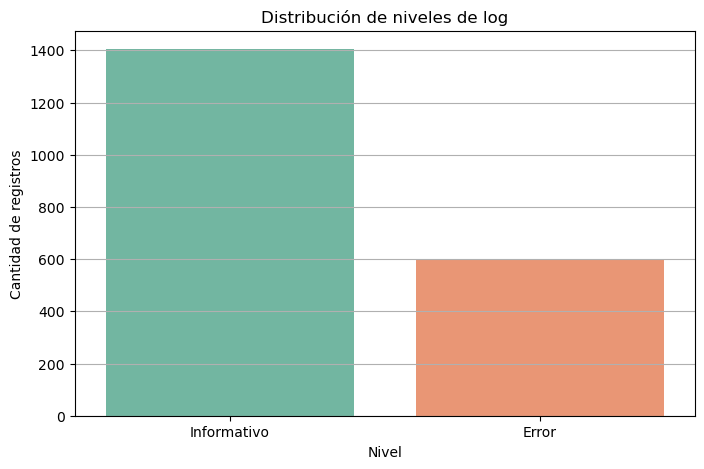

In [55]:
# Distribución por nivel
plt.figure(figsize=(8,5))
sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")
plt.title("Distribución de niveles de log")
plt.xlabel("Nivel")
plt.ylabel("Cantidad de registros")
plt.grid(axis='y')
plt.show()

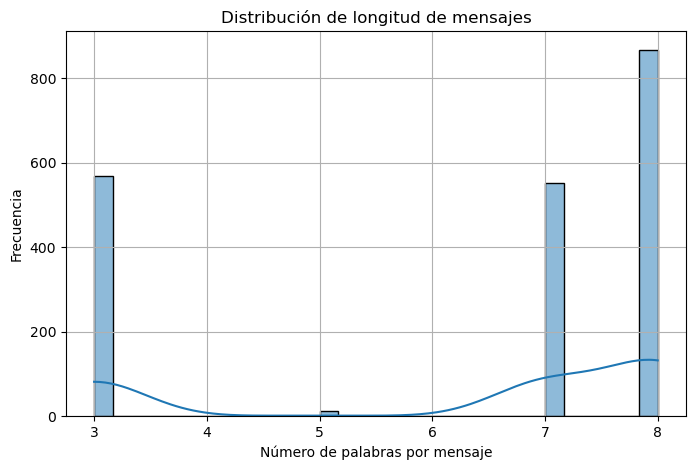

In [56]:
# Longitud de mensajes
plt.figure(figsize=(8,5))
sns.histplot(logDF['content_length'], bins=30, kde=True)
plt.title("Distribución de longitud de mensajes")
plt.xlabel("Número de palabras por mensaje")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

In [57]:
logDF.to_csv(f"{dir_path}{dataset}_2k.log_structured_to_process.csv", index=False, encoding='utf-8')